In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 7: predicting New York City energy production

In [3]:
# load nyc energy data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/nyc_energy.csv'
data = pd.read_csv(url,index_col='DATE',parse_dates=True)
data

,AWND,PRCP,SNOW,TAVG,day_of_week,month,holiday,LOAD
DATE,,,,,,,,
2018-01-01,17.67,0.00,0.0,12,0,1,1.0,1719.182034
2018-01-02,15.66,0.00,0.0,18,1,1,0.0,1764.714815
2018-01-03,8.28,0.00,0.0,21,2,1,0.0,1699.275172
2018-01-04,28.19,0.49,8.0,25,3,1,0.0,1722.843750
2018-01-05,25.05,0.00,0.0,15,4,1,0.0,1773.566997
...,...,...,...,...,...,...,...,...
2019-12-27,8.05,0.00,0.0,48,4,12,0.0,1358.152740
2019-12-28,8.50,0.00,0.0,47,5,12,0.0,1279.878125
2019-12-29,6.49,0.36,0.0,41,6,12,0.0,1308.771379


**Column descriptions:**

| column | description |
| :-- | --: |
| LOAD (**target vector**) | average electricity produced (in Watts) in New York City (CAPITAL zone)  |
| AWND | Average wind speed |
| PRCP | Precipitation |
| SNOW | Snowfall |
| SNWD | Snow depth |
| TAVG | Average Temperature |
| day_of_week | 0 (Mon), 1 (Tue), 2 (Wed), etc |
| month | 1 (Jan), 2 (Feb), 3 (Mar), etc |
| holiday | 1 (national holiday), 0 (no holiday)|

Your goal is to fit a linear regression model to this data to predict the energy produced on a given day (column `LOAD`), using the remaining variables.

In [6]:
def one_hot_encoding(v):
    # labels
    labels = np.unique(v)
    # ordinal encoding
    dic_labels = {labels[i]:i for i in range(len(labels))}
    ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
    # one-hot encoding
    V = np.zeros((len(v),len(labels)))
    V[np.arange(len(v)),ord_labels] = 1
    return V

In [7]:
# target vector 
y = data['LOAD'].to_numpy()

In [8]:
data.head(1)

,AWND,PRCP,SNOW,TAVG,day_of_week,month,holiday,LOAD
DATE,,,,,,,,
2018-01-01,17.67,0.0,0.0,12,0,1,1.0,1719.182034


In [9]:
# numerical features
X = data[['AWND','PRCP','SNOW','TAVG','holiday']].to_numpy()

In [10]:
# day of the week
X = np.c_[X,one_hot_encoding(data['day_of_week'].to_numpy())]

In [11]:
# month
X = np.c_[X,one_hot_encoding(data['month'].to_numpy())]

In [12]:
# polynomial features 
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

In [13]:
X_poly = build_poly_features(X,degree=2)

In [14]:
theta = np.linalg.lstsq(X_poly,y,rcond=None)[0]

In [15]:
# prediction
data['prediction'] = X_poly.dot(theta)

<AxesSubplot:xlabel='DATE'>

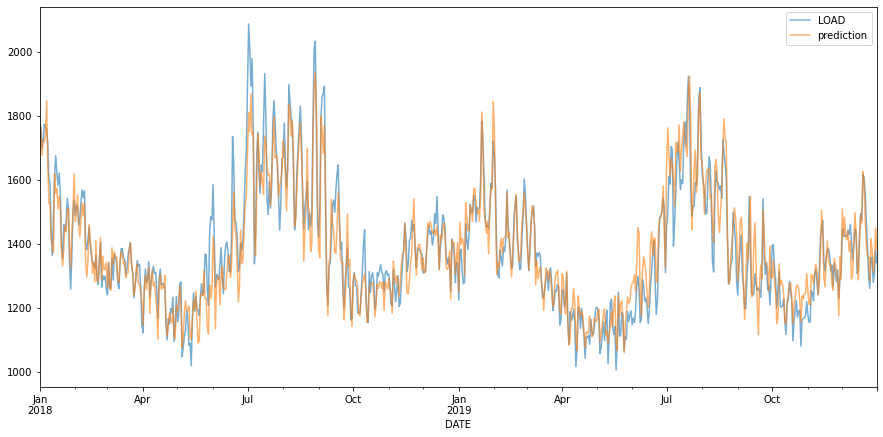

In [16]:

data[['LOAD','prediction']].plot(figsize=(15,7),alpha=0.6)